# CÓDIGO PARA LA CREACIÓN DE GRAFICOS DE BARRAS HORIZONTALES (PARA PORCENTAJES)

## Librerías Usadas

In [1]:
from matplotlib.pyplot import subplots, show  # Para crear la gráfica
from numpy import array, zeros                # Para manipular facilmente los datos
from os    import makedirs                    # Para crear la carpeta donde se guardan las gráficas

## Definición de la función

In [2]:
def create_Figure(
        Data,                                   # Los datos que se van a graficar
        ylabel          = 'Y axis',             # Titulo para el eje x
        title           = 'Horizontal barplot', # Titulo de la figura y nombre con el que se guarda
        legend_cols     = 2,                    # Número de columnas de la leyenda
        legend_offset   = 0,                    # Desfase de la legenda con la figura
        legend_fontsize = 10,                   # Tamaño de la fuente de la leyenda
        fig_size        = (7, 4),               # Tamaño de la figua
        new_order       = None,                 # Para reordenar la leyenda en caso de necesitarse
        bar_texts       = None,                 # Para poner textos sobre las barras
    ):

    # Desempaquetamos la información dada a la funcion
    labels      = list(Data.keys())[1:]
    information = list(Data.values())

    for_legend  = information[0]    
    names       = list(for_legend.keys())
    colors      = list(for_legend.values())

    bars        = array(information[1:])

    # Creamos una figura y un eje
    fig, ax = subplots(figsize = fig_size, dpi = 1200)

    # Dibujamos las barras como una sucesion de graficos de barras horizontales apiladas de 
    # izquierda a derecha con un desfase para que se vea correctamente
    bottom = zeros(len(bars)) # Esto define el desfase inicial de cada barra
    
    for category, name, color in zip(bars.T, names, colors):
        # Para que cuando halla una sola barra en la leyenda se muestren los porcentajes
        if len(bars) == 1:
            name = name + ' (' + str(round(category[0],2)) + '%)'

        # se dibuja cada barplot
        ax.barh(
            range(len(bars)), 
            category, 
            left      = bottom, 
            color     = color, 
            edgecolor = 'k', 
            label     = name, 
            height    = 0.7
        )

        # Se aumenta el desfase teniendo en cuenta el porcentaje de barra dibujado en esta iteración
        bottom += category

    # Se define una posición intermedia para poner las marcas sobre el eje vertical que harán de
    # separadores para las gráficas
    bar_separatos = [i - 0.5 for i in range(len(bars) + 1)]
    ax.set_yticks(bar_separatos)
    ax.set_yticklabels((len(bars) + 1)*['']) # Esto para que no tenga ninguna etiqueta
    
    # Se crean los labels para cada barra
    ax.set_yticks(range(len(bars)), minor=True)
    ax.set_yticklabels(labels, minor=True)

    # Se crean las marcas para el eje horizontal, en este caso se crean marcas principales cada
    # 10 unidades (las cuales tienen etiquetas) y marcas secundarias cada 1 unidad (sin etiquetas)
    ax.set_xticks(range(0,100+1,10),)
    ax.set_xticks(range(0,100+1, 1),  minor = True)
    ax.set_xticklabels(101*[''],  minor = True)

    # Definimos los titulos de la figura y de los ejes
    ax.set_ylabel(ylabel,       fontweight = 'bold')
    ax.set_xlabel('Percentage', fontweight = 'bold')
    ax.set_title(title,         fontweight = 'bold')

    # Eliminamos la linea que delimita la gráfica en la parte superior y derecha
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Configuramos las lineas inferior e izquierda de la gráfica para que se dibujen correctamente
    ax.spines['left'].set_position(('data', -3))  # Posiciona la primer marca
    ax.spines['left'].set_bounds(ax.get_yticks()[0], ax.get_yticks()[-1]) # define la longitud

    ax.spines['bottom'].set_position(('data', -0.6))  # Posiciona la primer marca
    ax.spines['bottom'].set_bounds(ax.get_xticks()[0], ax.get_xticks()[-1])# define la longitud

    # Configuramos las marcas para los ejes horizontal y vertical (marcas principales y secundarias)
    ax.tick_params(axis='y', which='major', direction='in', pad=5)
    ax.tick_params(axis='y', which='minor', length=0)
    ax.tick_params(axis='x', direction='in', pad=5)
    ax.tick_params(axis='x', direction='in', which='minor', pad=5)

    # Como se grafican porcentajes se supone que el valor máximo es 100 y se limita el eje
    # horizontal entre 0 y 100 (con una margen de 1 en cada dirección)
    ax.set_xlim(-1,101)


    # Esto es por si se desea cambiar el orden en el que aparecen los elementos de la leyenda
    # en cuyo caso se dibuja la leyenda, se extraen los elementos, se reorganizan, se elimina la
    # leyenda y se vuelve a dibujar reordenada
    ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    
    if new_order:

        handles = [handles[i] for i in new_order]
        labels  = [labels[i]  for i in new_order]

    ax.get_legend().remove()

    ax.legend(
        handles,
        labels,
        loc            ='lower center', 
        bbox_to_anchor = (0.5, legend_offset), 
        fontsize       = legend_fontsize,
        ncol           = legend_cols,
        handlelength   = 1, 
        handleheight   = 1,
        frameon        = False,
        handletextpad  = 0.3, 
        columnspacing  = 0.8
    )
    
    # Esto es para agregar texto en la parte superior de las barras
    if bar_texts:
        for position, text in zip(bar_separatos[1:], bar_texts):
            ax.text(0,position, text, ha = 'left', va = 'top', fontsize = 7)

    # Se intenta crear la carpeta Figuras (exist_ok es para que no haya problema si el directorio ya
    # habia sido creado anteriormente)
    makedirs('Figuras/', exist_ok = True)

    # Se guarda la figura en la carpeta Figuras con el titulo como nombre y se muestra en pantalla 
    fig.savefig(f'Figuras/{title}.png',  bbox_inches='tight', pad_inches=0.15, dpi = 1200)
    show()

## Ejemplos de Uso

### 1) Creando un barplot de 3 barras según datos de 
**Ramm LAW, JH Florisson, SL Watts, A Becker & JR Tweedley. 2021.** Artificial reefs in the Anthropocene: A review of geographical and historical trends in their design, purpose, and monitoring. Bulletin of Marine Science.

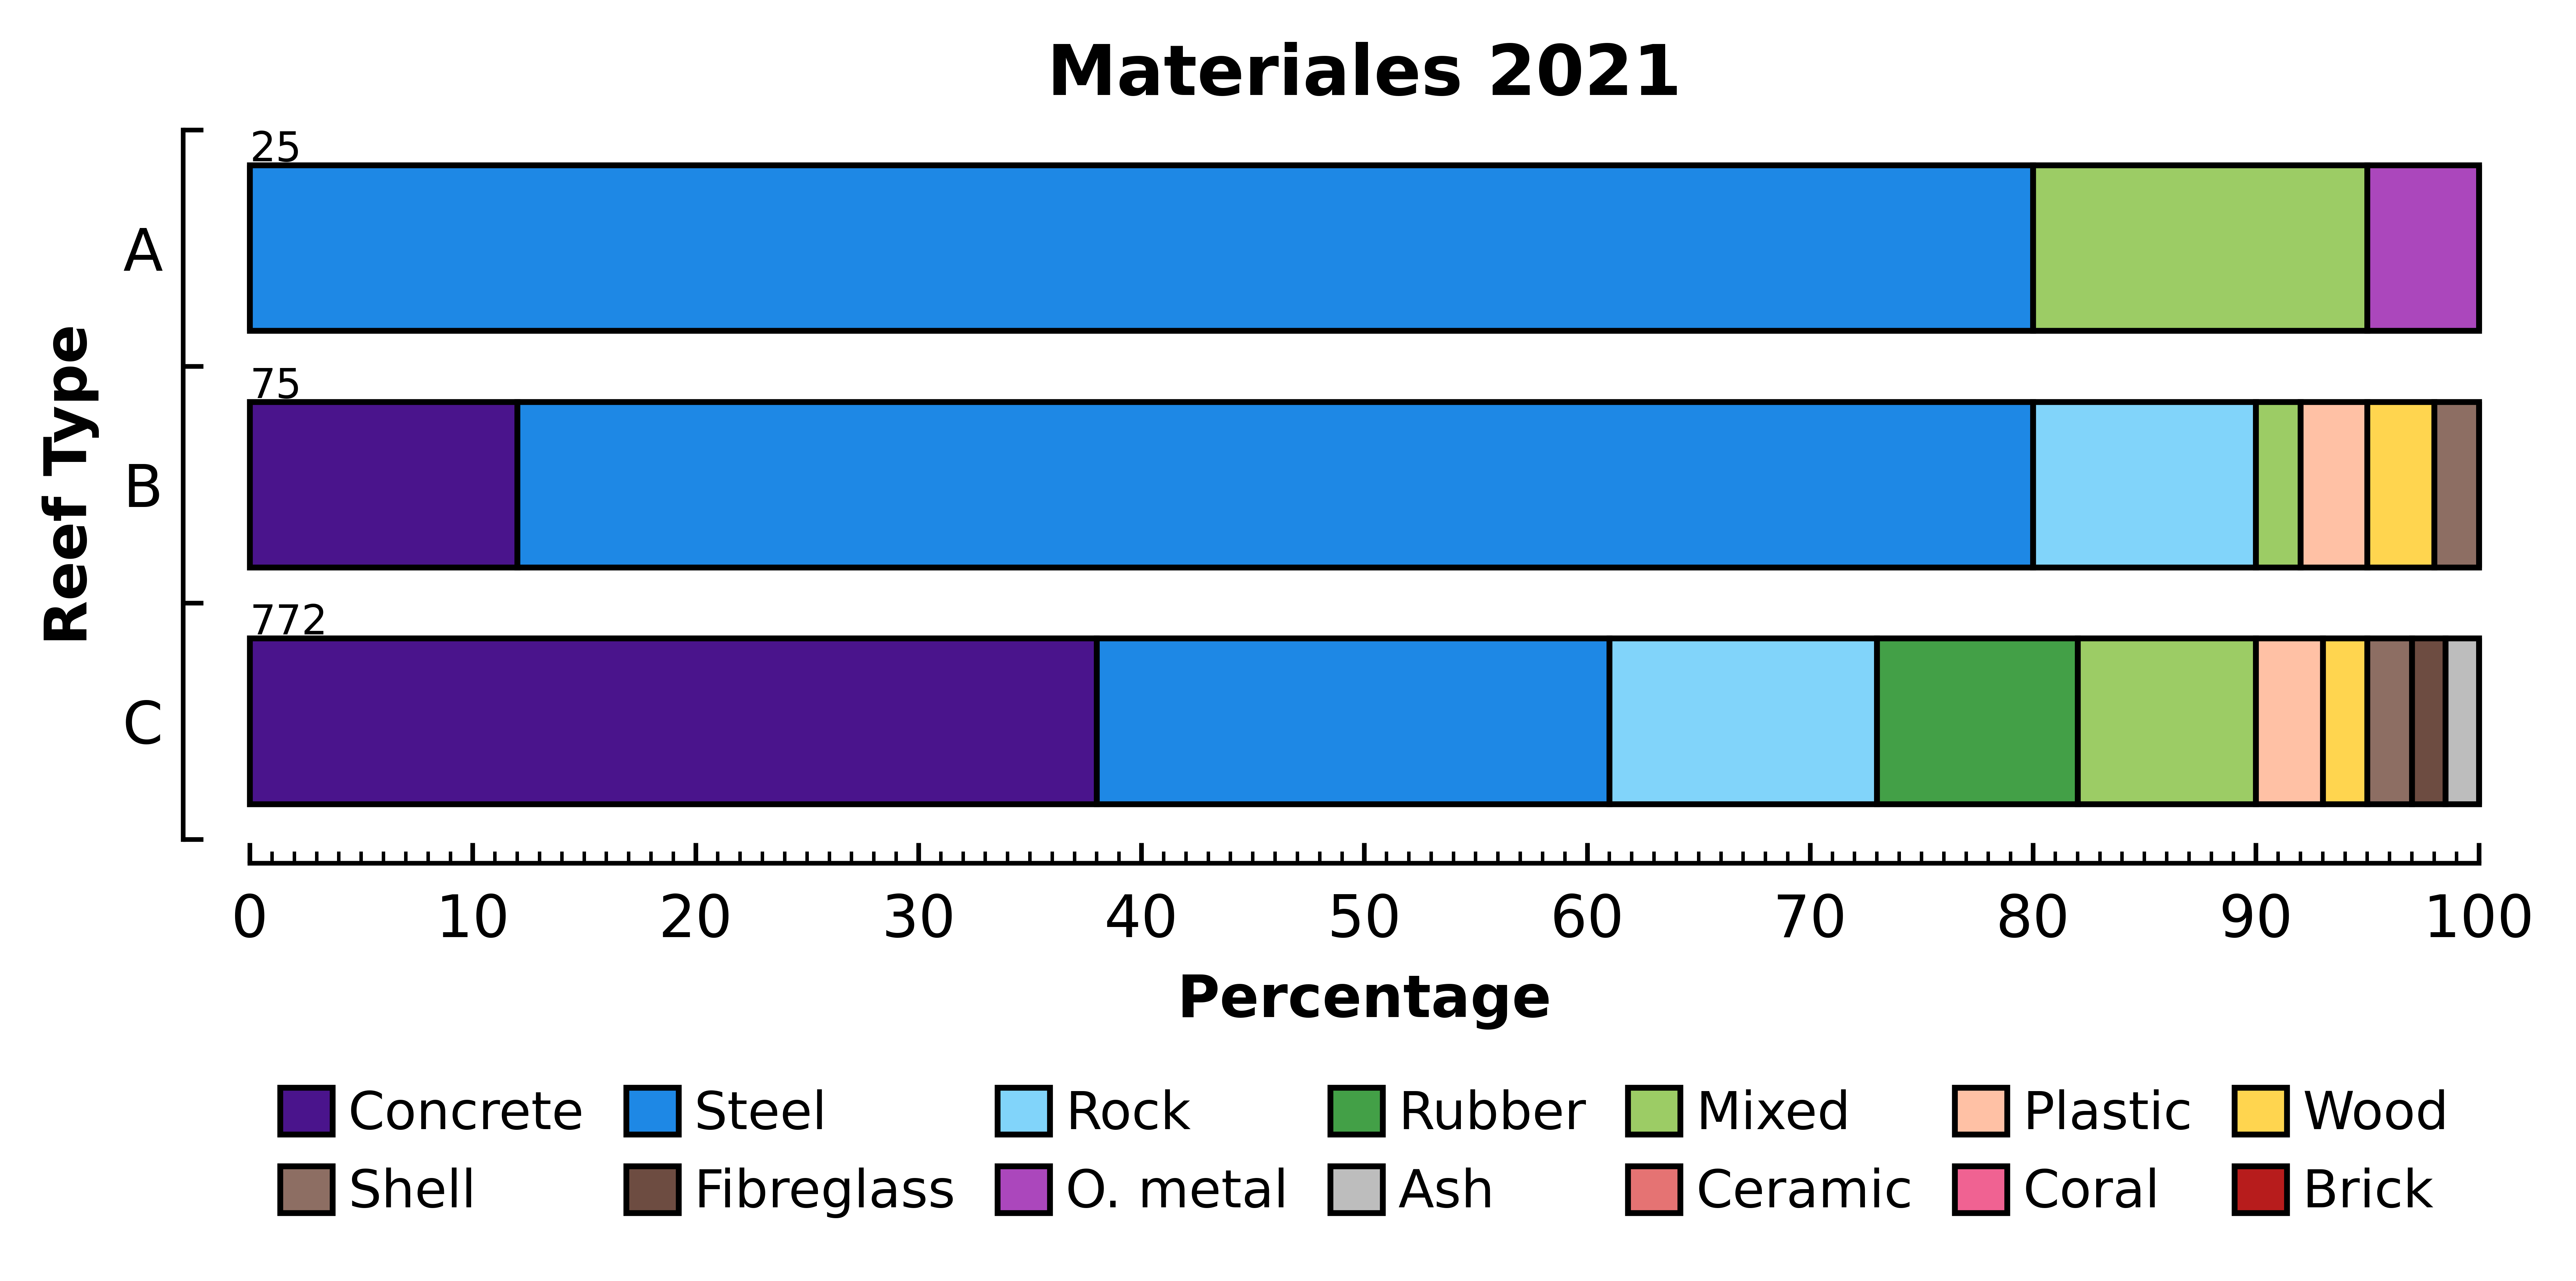

In [3]:
Data = {
    # El primer elemento debe ser un diccionario que tenga en su interior una secuencia con el
    # 'Nombre':'color' que quiera que se muestre para cada elemento
    'Legend':{
        'Concrete'   : '#4A148C', 
        'Steel'      : '#1E88E5',
        'Rock'       : '#81D4FA',
        'Rubber'     : '#43A047',  
        'Mixed'      : '#9CCC65',
        'Plastic'    : '#FFC1A5',
        'Wood'       : '#FFD54F',
        'Shell'      : '#8D6E63',
        'Fibreglass' : '#6D4C41',
        'O. metal'   : '#AB47BC',
        'Ash'        : '#BDBDBD',
        'Ceramic'    : '#E57373',
        'Coral'      : '#F06292',
        'Brick'      : '#B71C1C',
    },

    # Se crea una lista por cada barra horizontal que se quiera, y debe contener una sucesion de los
    # porcentajes que correspondan a cada elemento de los definidos en 'Legend', en este caso se 
    # quieren 3 barras horizontales.
    'C' : [38, 23, 12, 9,  8,  3,  2, 2, 1.5, 0, 1.5, 0, 0, 0],
    'B' : [12, 68, 10, 0,  2,  3,  3, 2,   0, 0,   0, 0, 0, 0],
    'A' : [ 0, 80,  0, 0, 15,  0,  0, 0,   0, 5,   0, 0, 0, 0],
}

new_order = [0, 7, 1, 8, 2, 9, 3, 10, 4, 11, 5, 12, 6, 13]

create_Figure(
    Data,  
    title           = 'Materiales 2021',
    ylabel          = 'Reef Type', 
    legend_cols     = 7,
    legend_offset   = -0.6,
    legend_fontsize = 9,
    fig_size        = (7,2.2),
    new_order       = new_order, bar_texts = ['772','75','25']
)

### Creando un barplot de una sola barra según datos de

**Baine M. 2001.** Artificial reefs: a review of their design, application, management and performance. Ocean & Coastal Management.

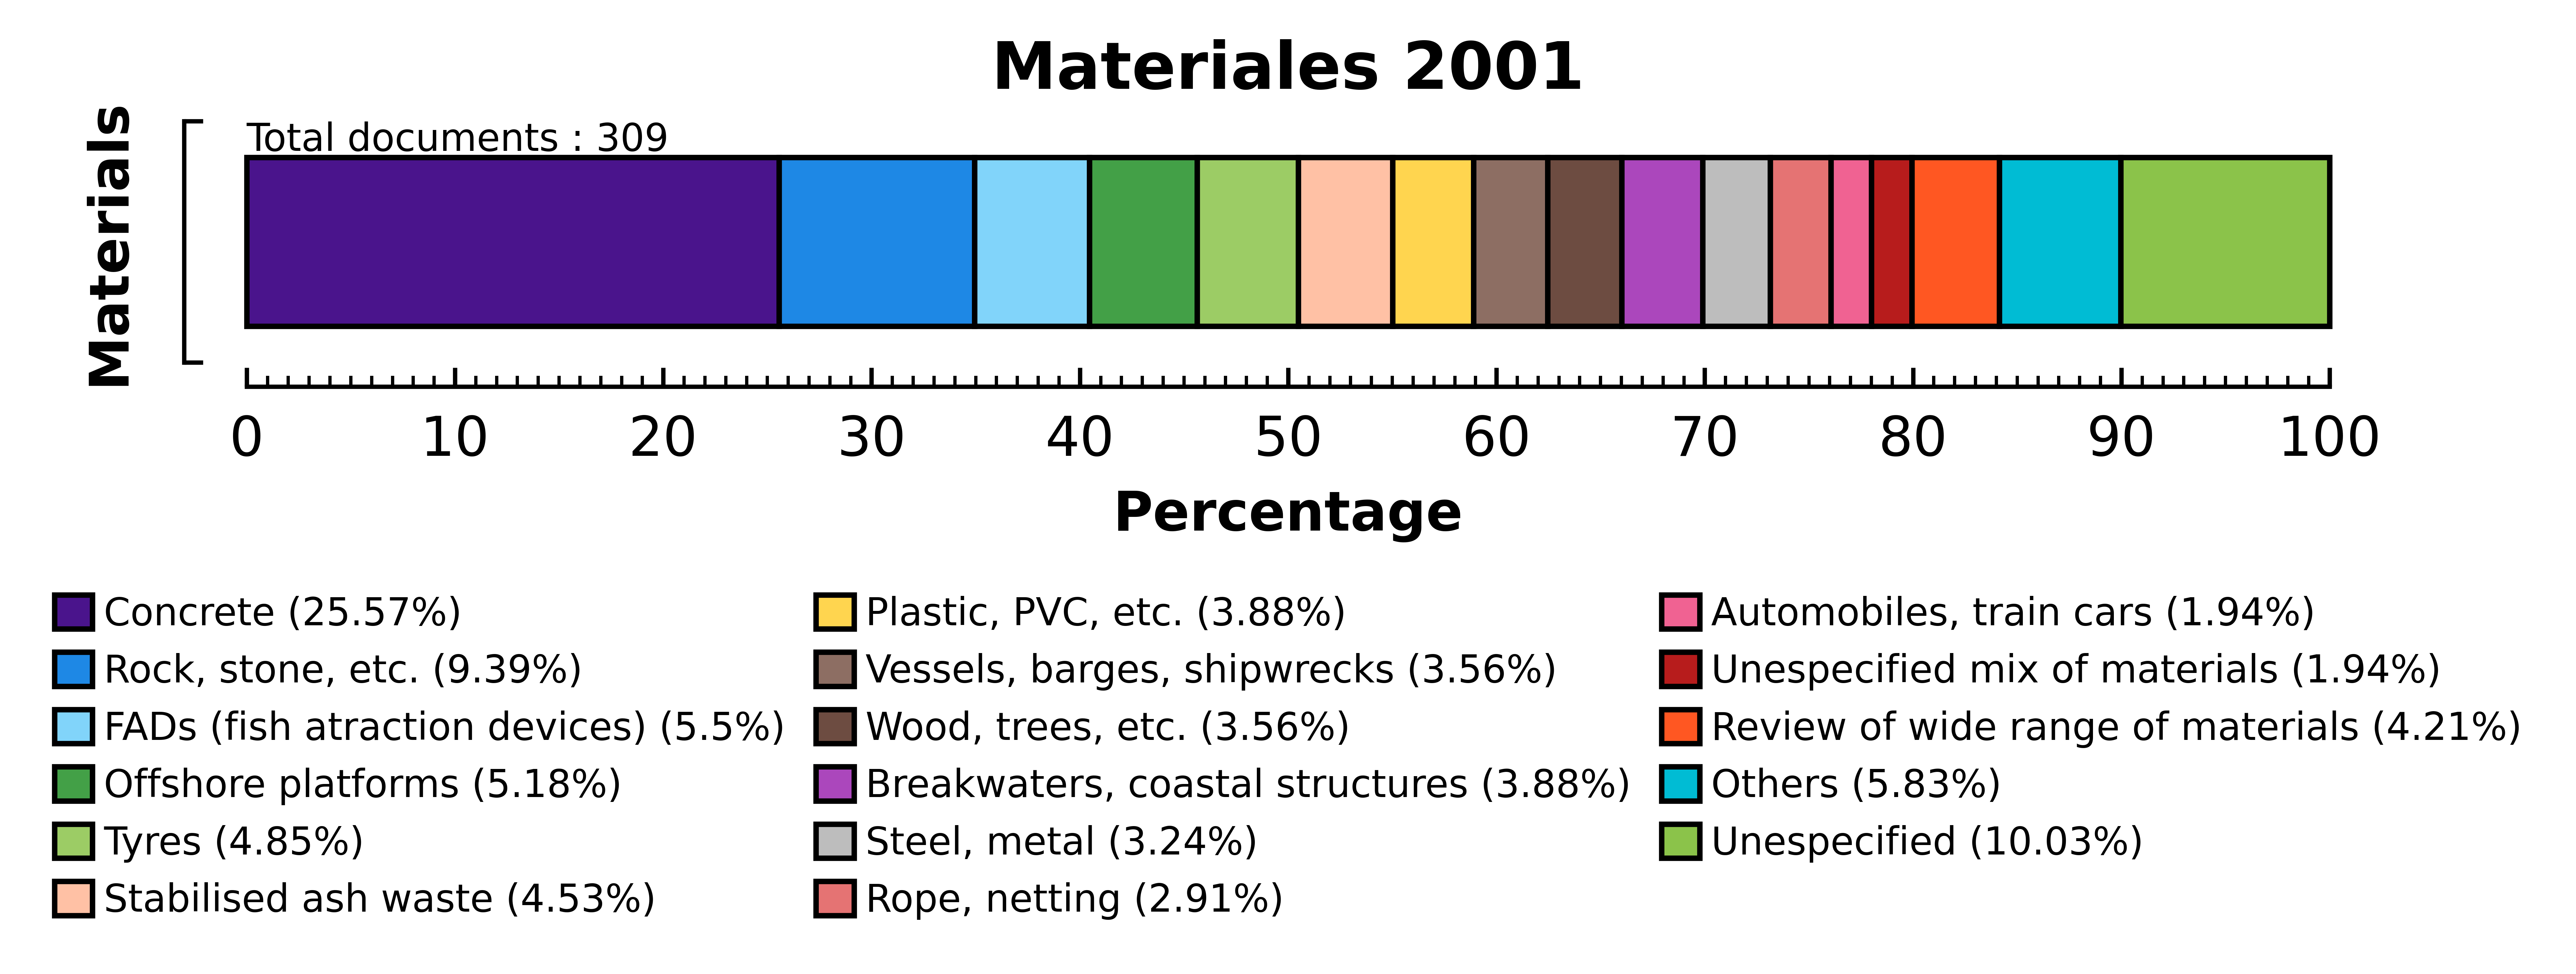

In [4]:
documents_published = [79, 29, 17, 16, 15, 14, 12, 11, 11, 12, 10, 9, 6, 6, 13, 18, 31]
total = sum(documents_published)

Data2 = {
    'Legend' : {
        'Concrete'                          : '#4A148C',
        'Rock, stone, etc.'                 : '#1E88E5',
        'FADs (fish atraction devices)'     : '#81D4FA',
        'Offshore platforms'                : '#43A047',
        'Tyres'                             : '#9CCC65',
        'Stabilised ash waste'              : '#FFC1A5',
        'Plastic, PVC, etc.'                : '#FFD54F',
        'Vessels, barges, shipwrecks'       : '#8D6E63',
        'Wood, trees, etc.'                 : '#6D4C41',
        'Breakwaters, coastal structures'   : '#AB47BC',
        'Steel, metal'                      : '#BDBDBD',
        'Rope, netting'                     : '#E57373',
        'Automobiles, train cars'           : '#F06292',
        'Unespecified mix of materials'     : '#B71C1C',
        'Review of wide range of materials' : '#FF5722',
        'Others'                            : '#00BCD4',
        'Unespecified'                      : '#8BC34A',
    },
    '' : [num/total*100 for num in documents_published]
}

create_Figure(
    Data2, 
    title           = 'Materiales 2001',
    ylabel          = 'Materials', 
    legend_cols     = 3,
    legend_offset   = -2.45,
    legend_fontsize = 7,
    fig_size        = (7, 0.8),
    bar_texts       = [f'Total documents : {total}']
)